# K-means

## Research objectives:

    1. Implementation (numpy only)
    2. Initialization research
    3. Tasks compatibility research 
    4. k definition strategy
    5. Time efficiency research
    6. Distance visualization

### 1. Implementation

$ \textbf{Cumulative distances formula} $

$ L = \sum_{i}^{C}\sum_{j}^{} \omega_{ij} \| x_j - c_i\| $

$ c_i - centroid \space of \space cluster \space i $

$
\omega_{ij} = \left\{
    \begin{array}\\
        1 & \mbox{if } \ x_j \in C_i \\
        0 & \mbox{if } \ x_j \notin C_i
    \end{array}
\right.
$

$ \textbf{L has minimum value if:} $

$
\omega_{ij} = \left\{
    \begin{array}\\
        1 & \mbox{if } \ \|x_j - c_i\| = \min_{c_i} (\|x_j - c_i\|) \\
        0 & \mbox{otherwise}
    \end{array}
\right.
$

$ \textbf{Cluster centroids optimization:} $

$ c_i = \frac{\sum_{j}^{}\omega_{ij} x_j}{\sum_{j}^{} \omega_{ij}} - \text{New center of mass }$

In [57]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt


def gen_centroids(X, k):
    
    '''
    Generates random centroids for k clustes
    
    X: dataset
    k: number of clusters 
    
    returns: np.array(k, 2) of centroids
    '''
    
    return X[np.random.permutation(X.shape[0])[0:k]]


def compute_distances(X, C):
    
    '''
    Computes distanecs between points and centroids
    
    X: dataset
    C: centroids np.array(num_clusters, dim)
    
    returns: np.array(X.shape[0], num_clusters) of distances
    '''
    
    d = np.empty((0))
    for i in range(C.shape[0]):
        d = np.append(d, np.linalg.norm(X - C[i, :], axis=1), axis=0)
    return d.reshape((-1, C.shape[0]), order='F')


def assign_label(X, C):
    
    '''
    Assings label to each feature
    
    distances: np.array(X.shape[0], num_clusters)
    
    returns: np.array(X.shape[0], ) - labels
    '''
    
    return np.argmin(compute_distances(X, C), axis=1)


def loss(X, C):
    
    '''
    Computes cumulative distance for each cluster divided by number of
    features in it. Then sums these values up
    
    X: dataset
    C: centroids np.array(num_clusters, 2)
    
    returns: loss
    '''
    
    l = 0
    distances = compute_distances(X, C)
    labels = assign_label(X, C)
    
    for i in range(distances.shape[1]):
        length = distances[labels == i].shape[0]
        if length != 0:
            l += np.sum(distances[labels == i], axis=0)[i] / length
        
    return l


def new_centroid(X_cluster):
    
    '''
    Computes new centroid for cluster
    
    X_cluster: np.array(n, dim)
    
    returns: np.array(1, dim) - new centroid
    '''
    
    return np.mean(X_cluster, axis=0).reshape(1, -1)


def update_centroids(X, C):
    
    '''
    Updates centroids
    
    X: dataset
    labels: data labels
    
    returns: np.array(num_clusters, dim) - updated centroids
    '''
    
    distances = compute_distances(X, C)
    labels = assign_label(X, C)
    num_clusters = C.shape[0]
    new_C = np.empty((0, X.shape[1]))
    
    for i in range(num_clusters):
        length = distances[labels == i].shape[0]
        if length != 0:
            new_C = np.append(new_C, new_centroid(X[labels == i]), axis=0)
        else:
            new_C = np.append(new_C, C[i])
            
    return new_C
    

def fit(X, C, num_epochs):
    
    '''
    Fits model on num_epochs epochs
    
    X: dataset
    C: centroids np.array(num_clusters, dim)
    num_epochs: int
    
    returns: Tuple(np.array(num_clusters, 2) - last time updated centroids, losses - np.array(num_epochs, ))
    '''
    
    losses = np.empty(0)
    for epoch in range(num_epochs):
        losses = np.append(losses, np.array([loss(X, C)]), axis=0)
        C = update_centroids(X, C)
    
    return C, losses

#### Testing

In [2]:
# dataset 1

X_t1 = np.random.randn(50, 2) * 20 - 10
X_t1 = np.append(X_t1, np.random.randn(50, 2) * 10 + 50, axis=0)

In [12]:
# randomly generated centroids for dataset 1

C_t1 = gen_centroids(X_t1, 2)

In [13]:
# final centroid positions, array of losses

C_t1_last, losses_t1 = fit(X_t1, C_t1, 10)

In [20]:
# labeling the dataset

labels_t1 = assign_label(X_t1, C_t1_last)

In [58]:
# dataset 2

X_t2 = np.random.randn(10, 2) * 7 - 50
X_t2 = np.append(X_t2, np.random.randn(50, 2) * 10 + 50, axis=0)
X_t2 = np.append(X_t2, np.random.randn(10, 2) * 5 - 30, axis=0)
X_t2 = np.append(X_t2, np.random.randn(10, 2) * 8 + 10, axis=0)

In [60]:
# randomly generated centroids for dataset 1

C_t2 = gen_centroids(X_t2, 4)

In [61]:
# final centroid positions, array of losses

C_t2_last, losses_t2 = fit(X_t2, C_t2, 10)

In [67]:
# labeling the dataset

labels_t2 = assign_label(X_t2, C_t2_last)

Text(0, 0.5, 'Distance')

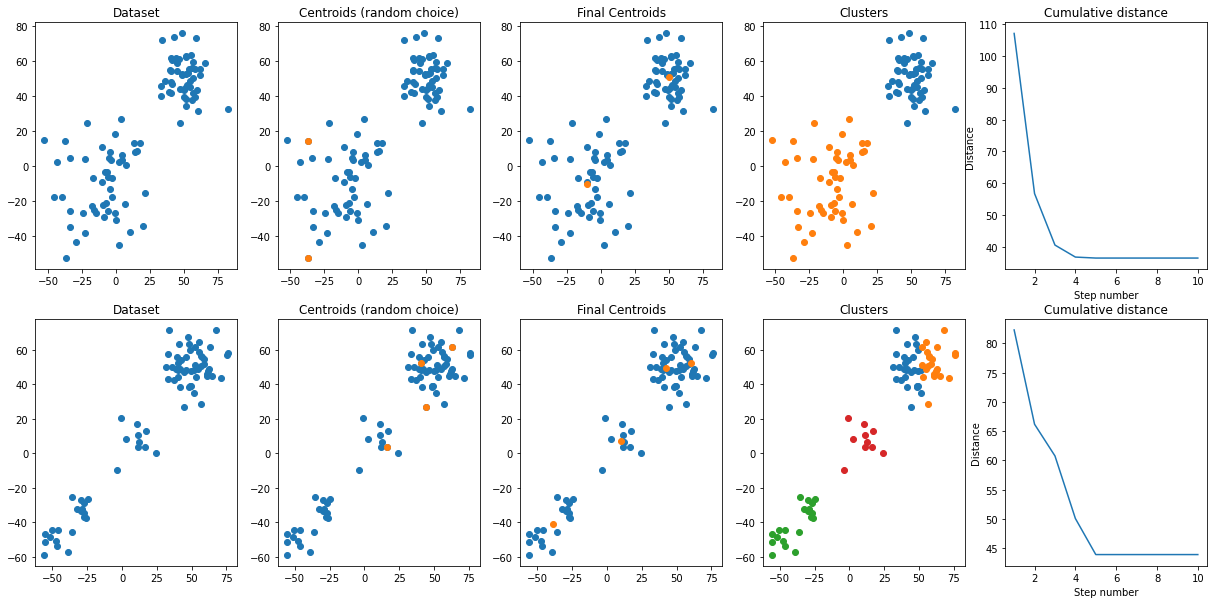

In [85]:
fig, axes = plt.subplots(figsize=(21, 10), nrows=2, ncols=5)
#plt.tight_layout()

# dataset 1

axes[0][0].scatter(X_t1[:, 0], X_t1[:, 1])
axes[0][0].set_title('Dataset')

axes[0][1].scatter(X_t1[:, 0], X_t1[:, 1])
axes[0][1].scatter(C_t1[:, 0], C_t1[:, 1])
axes[0][1].set_title('Centroids (random choice)')

axes[0][2].scatter(X_t1[:, 0], X_t1[:, 1])
axes[0][2].scatter(C_t1_last[:, 0], C_t1_last[:, 1])
axes[0][2].set_title('Final Centroids')

for i in range(2):
    axes[0][3].scatter(X_t1[labels_t1 == i][:, 0], X_t1[labels_t1 == i][:, 1])
axes[0][3].set_title('Clusters')

axes[0][4].plot(list(range(1, len(losses_t1) + 1)), losses_t1)
axes[0][4].set_title('Cumulative distance')
axes[0][4].set_xlabel('Step number')
axes[0][4].set_ylabel('Distance')

# dataset 2

axes[1][0].scatter(X_t2[:, 0], X_t2[:, 1])
axes[1][0].set_title('Dataset')

axes[1][1].scatter(X_t2[:, 0], X_t2[:, 1])
axes[1][1].scatter(C_t2[:, 0], C_t2[:, 1])
axes[1][1].set_title('Centroids (random choice)')

axes[1][2].scatter(X_t2[:, 0], X_t2[:, 1])
axes[1][2].scatter(C_t2_last[:, 0], C_t2_last[:, 1])
axes[1][2].set_title('Final Centroids')

for i in range(4):
    axes[1][3].scatter(X_t2[labels_t2 == i][:, 0], X_t2[labels_t2 == i][:, 1])
axes[1][3].set_title('Clusters')

axes[1][4].plot(list(range(1, len(losses_t2) + 1)), losses_t2)
axes[1][4].set_title('Cumulative distance')
axes[1][4].set_xlabel('Step number')
axes[1][4].set_ylabel('Distance')

### 2. Initialization research

#### - K-means++ (Initialization) algorithm

$$ 1. \text{Take one center $c_1$, chosen uniformly at random from $X$} $$

$$ 2. \text{Take a new center $c_i$, choosing $x$ ∈ $X$ with probability } \frac{D(x)^2}{\sum_{x ∈ X}^{}D(x)^2} $$

$$ \text{(Where $D$ stands for the shortest distance from data point to the centroids which already exist)} $$

$$ 3. \text{Repeat Step 2 until we have taken k centers altogether} $$

References

[1] David Arthur, Sergei Vassilvitskii $\textit{The Advantages of Careful Seeding}$

In [3]:
def pp_gen_first(X):
    
    '''
    Generates random centroid based on dataset
    
    X: dataset
    
    returns: np.array(1, 2) - centroid
    '''
    
    return gen_centroids(X, 1)


def pp_compute_shortets_distances(X, C):
    
    '''
    Computes distances between given centroids and data points
    
    X: dataset
    C: np.array(m, 2) - centroids
    
    returns: np.array(X.shape[0], 1) - shortest distances
    '''
    
    return np.min(compute_distances(X, C), axis=1).reshape(-1, 1)


def pp_get_centroid(X, C):
    
    '''
    Finds proper centroid
    
    X: dataset
    C: np.array(m, dim) - centroids
    
    returns: np.array(1, dim) - centroid
    '''
    
    return X[np.argmax(pp_compute_shortets_distances(X, C), axis=0)]


def pp_centroids(X, k):
    
    '''
    Finds proper centroid set of k elements based on given dataset
    
    X: dataset
    k: number of clusters
    
    returns: np.array(k, dim) - centroids
    '''
    
    C = pp_gen_first(X)
    
    for i in range(k - 1):
        C = np.append(C, pp_get_centroid(X, C), axis=0)
        
    return C

##### Drawbacks
    1) Convergence depends on the 1st data point selection
    2) Doesn't predict the data shape or any possible patterns 

#### - Initialization based on points attributes 

Sums up the data attributes and then sorts the data array by these values. Then splits the dataset into k "batches" which define centroid positions  

In [4]:
def pa_centroids(X, k):
    
    '''
    Splits the dataset into k batches and returns one centroid from each batch
    
    X: dataset
    k: number of clusters
    
    returns: np.array(k, dim) - centroids 
    '''
    
    pos = np.argsort(np.sum(X, axis=1), axis=0)
    X = X[pos]
    C = X[::int(X.shape[0] / k)][:k]
    
    return C

##### Drawbacks
    1) Can not distinguish points with symmetrical coordinates (e.g. (5, 100) and (100, 5)). Hence it can mess 
    their clusters up

#### - Central initialization

Initializes centroids around the central point (the very center of the dataset)

In [7]:
import math

def ci_centroids(X, k, scale=0.1):
    
    '''
    Initializes centroids around the center of dataset
    
    X: dataset
    k: number of clusters
    scale: scaling parameter, defines circle radius 
    
    returns: np.array(k, dim) - centroids 
    '''
    
    cnt = (np.max(X, axis=0) + np.min(X, axis=0)) / 2
    r = np.min(np.abs(np.max(X, axis=0) - np.min(X, axis=0))) * scale
    delta_a = 2 * math.pi / k
    a = 0
    C = np.empty((0, X.shape[1]))
    
    for i in range(k):
        shift = np.zeros(X.shape[1])
        shift[0] = r * math.cos(a)
        shift[1] = r * math.sin(a)
        C = np.append(C, cnt + shift.reshape(1, -1), axis=0)
        a += delta_a
        
    return C

##### Drawbacks:
    1) Doesn't predict the data shape or any possible patterns 

#### Evaluating

In [94]:
import pandas as pd

X = pd.read_csv('clustering.csv').values

In [112]:
# hyper parameters

num_epochs = 10
num_clusters = 4
num_samples = 500
num_tests = 4

In [113]:
# Centroids

C = np.empty((0, num_clusters, 2))
C = np.append(C, gen_centroids(X, num_clusters).reshape(1, -1, 2), axis=0) # random centroids 
C = np.append(C, pp_centroids(X, num_clusters).reshape(1, -1, 2), axis=0) # k-means++ centroids 
C = np.append(C, pa_centroids(X, num_clusters).reshape(1, -1, 2), axis=0) # points attributes based centroids 
C = np.append(C, ci_centroids(X, num_clusters).reshape(1, -1, 2), axis=0) # central initialization centroids 

In [114]:
# Updated centroids and losses

C_last = np.empty((0, num_clusters, 2))
losses = np.empty((0, num_epochs))

for i in range(4):
    tpl = fit(X, C[i], num_epochs=num_epochs)
    C_last = np.append(C_last, tpl[0].reshape(1, -1, 2), axis=0)
    losses = np.append(losses, tpl[1].reshape(1, -1), axis=0)

In [115]:
# Labels

labels = np.empty((0, num_samples))
for i in range(4):
    labels = np.append(labels, assign_label(X, C_last[i]).reshape(1, -1), axis=0)

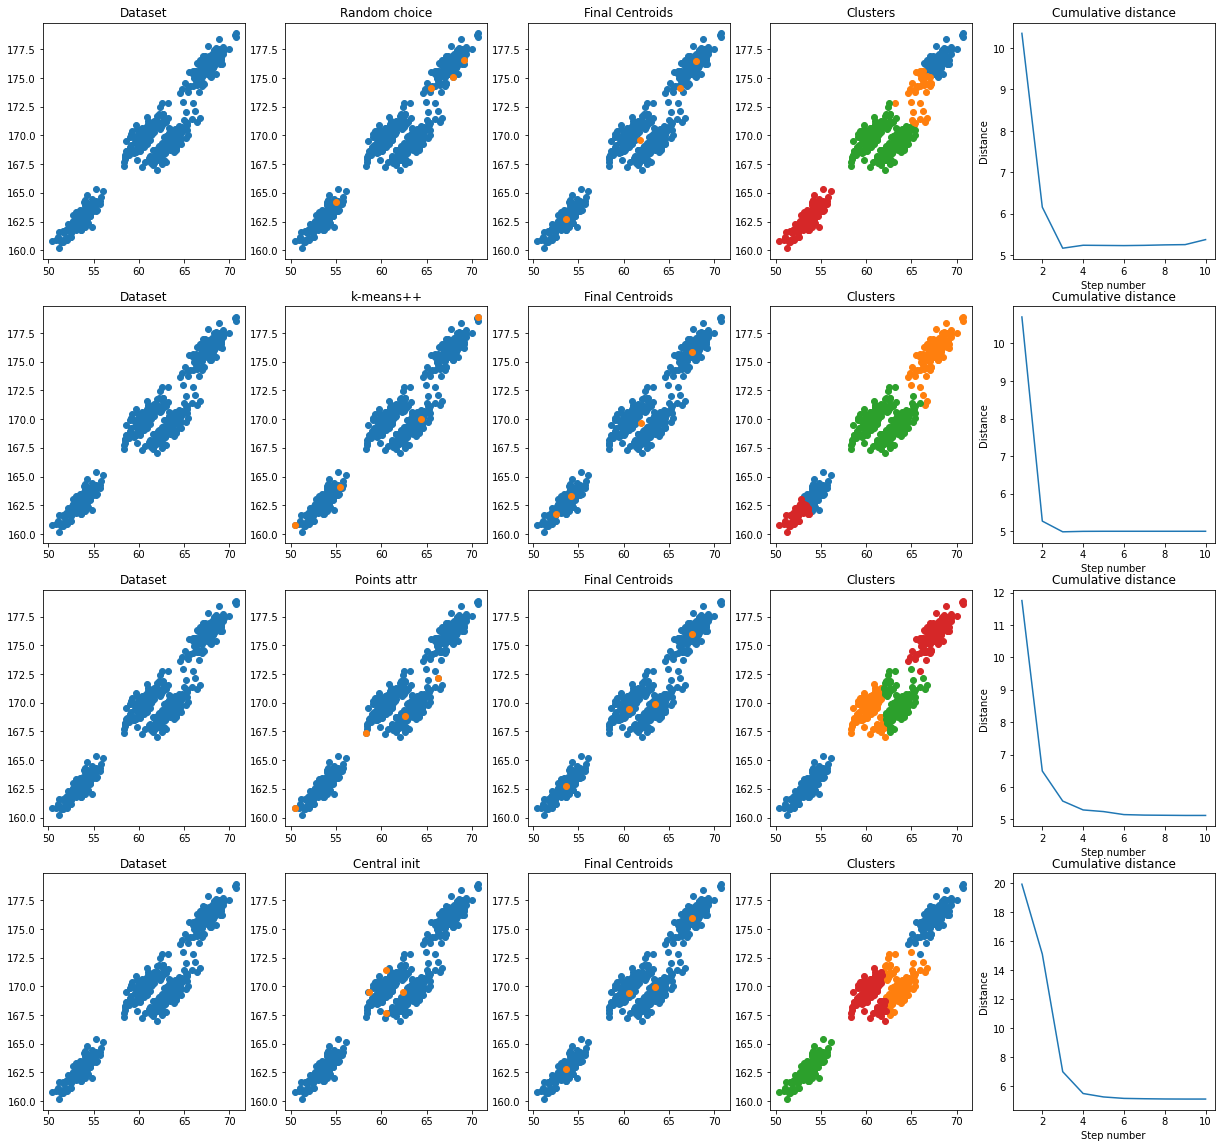

In [117]:
# Plots

fig, axes = plt.subplots(figsize=(21, 20), nrows=4, ncols=5)

info = ['Random choice', 'k-means++', 'Points attr', 'Central init']

for i in range(num_tests):
    axes[i][0].scatter(X[:, 0], X[:, 1])
    axes[i][0].set_title('Dataset')

    axes[i][1].scatter(X[:, 0], X[:, 1])
    axes[i][1].scatter(C[i][:, 0], C[i][:, 1])
    axes[i][1].set_title(info[i])

    axes[i][2].scatter(X[:, 0], X[:, 1])
    axes[i][2].scatter(C_last[i][:, 0], C_last[i][:, 1])
    axes[i][2].set_title('Final Centroids')

    for j in range(num_clusters):
        axes[i][3].scatter(X[labels[i] == j][:, 0], X[labels[i] == j][:, 1])
    axes[i][3].set_title('Clusters')

    axes[i][4].plot(list(range(1, len(losses[i]) + 1)), losses[i])
    axes[i][4].set_title('Cumulative distance')
    axes[i][4].set_xlabel('Step number')
    axes[i][4].set_ylabel('Distance')

##### Conclusions 
    1) Random initialization is relatively slow and can lead to unpredictable behavior of model
    2) Although k-means++ is the fastest in converence, it depends on the first point initialization  
    3) In most cases initialization based on points attributes and central initialization end up similarly. 
    Points attributes method is usually a bit faster

### 3. Tasks compatibility research

$\textbf{1) K-means in classification problem}$


Clustering iris dataset with our models to test the predictions accuracy

In [46]:
import seaborn as sns

iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##### k-means++ init evaluating

In [137]:
X_iris = iris.values[:, :4].astype('float64') # dataset 
C_iris_0 = pp_centroids(X_iris, 3) # k-means++ initialization
C_iris, losses_iris = fit(X_iris, C_iris_0, num_epochs=10) # training model
labels_iris = assign_label(X_iris, C_iris) # labeling

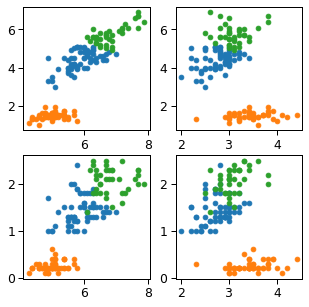

<Figure size 576x432 with 0 Axes>

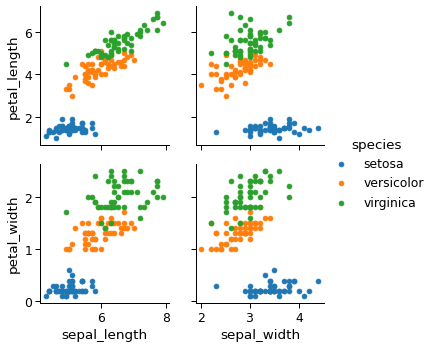

In [138]:
# Plot predictions

fig, axes = plt.subplots(figsize=(5, 5), nrows=2, ncols=2)

for i in range(2):
    for j in range(2):
        
        axes[i][j].scatter(X_iris[labels_iris == 0][:, j], X_iris[labels_iris == 0][:, i + 2])
        axes[i][j].scatter(X_iris[labels_iris == 1][:, j], X_iris[labels_iris == 1][:, i + 2])
        axes[i][j].scatter(X_iris[labels_iris == 2][:, j], X_iris[labels_iris == 2][:, i + 2])
        
# Plot real labels 

plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)


iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)
iris_g.add_legend()

Model predictions are close to the original labels. We can compare the accuracy of models with different initialization methods using kNN 

In [160]:
# kNN 

def knn_distances(X, point):
    
    '''
    Computes distances between the given point and other points from dataset
    
    X: dataset
    point: np.array(1, dim)
    
    returns: np.array(X.shape[0], 1)
    '''
    
    return np.linalg.norm(X - point, axis=1).reshape(-1, 1)
    

def knn_labels(X, labels, point, k):
    
    '''
    Returnes k nearest labels
    
    X: dataset
    labels: np.array(X.shape[0], 1)
    point: np.array(1, dim)
    k: number of nearest neighbours
    
    returns: np.array(k, 1) - nearest labels
    '''
    
    distances = knn_distances(X, point)
    return labels[np.argsort(distances, axis=0)][:k].reshape(-1, 1)

def knn(X, labels, point, k):
    
    '''
    Finds the proper label
    
    X: dataset
    labels: np.array(X.shape[0], 1)
    point: np.array(1, dim)
    k: number of nearest neighbours
    
    returns: int label
    '''
    
    labels = knn_labels(X, labels, point, k)
    bins = np.bincount(labels.ravel())
    maximum = np.max(bins)
    if np.count_nonzero(bins == maximum) != 1:
        return -1
    else:
        return np.argmax(bins)


# Evaluating
  
def get_accuracy(X_train, labels_train, X_test, labels_test, k, species):
    
    '''
    Returns model's accuracy on given dataset
    
    X_train: dataset
    labels_train: model generated labels for this dataset 
    X_test: test data set
    labels_test: the ral labels
    k: number of nearest neighbours
    
    returns: model's accuracy
    '''

    preds = np.empty(0)
    for i, point in enumerate(X_iris_test):
        preds = np.append(preds, np.array([species[knn(X_train, labels_train, point, k)]
                                          == labels_test[i][0]]))
    
    return np.count_nonzero(preds) / X_test.shape[0]

In [140]:
order = np.random.permutation(X_iris.shape[0]) # shuffle elements in dataset

In [168]:
X_iris_train = X_iris[order][:120, :] # 120 elements for training, 30 for testing

# MODEL GENERATED labels
# We will classify points based on these labels

# random choice
C_rc_0 = gen_centroids(X_iris, 3)
C_rc, _ = fit(X_iris, C_rc_0, num_epochs=10)
labels_rc = assign_label(X_iris, C_rc)
labels_iris_train_rc = labels_rc[order][:120]

# k-means++
labels_iris_train_pp = labels_iris[order][:120] 

# points attr
C_pa_0 = pa_centroids(X_iris, 3)
C_pa, _ = fit(X_iris, C_pa_0, num_epochs=10)
labels_pa = assign_label(X_iris, C_pa)
labels_iris_train_pa = labels_pa[order][:120]

# cental initialization
C_ci_0 = ci_centroids(X_iris, 3)
C_ci, _ = fit(X_iris, C_ci_0, num_epochs=10)
labels_ci = assign_label(X_iris, C_ci)
labels_iris_train_ci = labels_ci[order][:120]


X_iris_test = X_iris[order][120:, :] # test dataset

# the REAL labels
labels_iris_test = iris.values[:, 4:][order][120:, :] 

In [186]:
# Since the centroids are randomly linked to the clusters, we have to define those connections manually: 
a = [['virginica', 'versicolor', 'setosa'],
     ['versicolor', 'setosa', 'virginica'],
     ['setosa', 'versicolor', 'virginica'],
     ['virginica', 'setosa', 'versicolor']]

print(f"Random choice: {get_accuracy(X_iris_train, labels_iris_train_rc, X_iris_test, labels_iris_test, 1, a[0])}")
print(f"k-means++: {get_accuracy(X_iris_train, labels_iris_train_pp, X_iris_test, labels_iris_test, 1, a[1])}")
print(f"Points attributes: {get_accuracy(X_iris_train, labels_iris_train_pa, X_iris_test, labels_iris_test, 1, a[2])}")
print(f"Central init: {get_accuracy(X_iris_train, labels_iris_train_ci, X_iris_test, labels_iris_test, 1, a[3])}")

Random choice: 0.9
k-means++: 0.9
Points attributes: 0.9
Central init: 0.9


All methods have a prediction accuracy of 90% on test iris samples, which is quite good perfomance on 10 epochs. We can use them to predict class of a new data point using kNN.

$\textbf{2) K-means in image comression}$

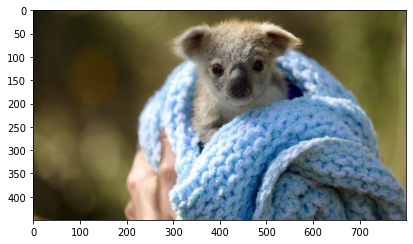

In [75]:
from PIL import Image

# Loading image
image = Image.open('koala.jpg')
data = np.asarray(image)

# Plotting image
plt.imshow(data)

In [77]:
# Reshaping & normalizing data 
X_0 = data.reshape(data.shape[0] * data.shape[1], 3) / 255

In [79]:
# Init the model using k-means++
C_0 = pp_centroids(X_0, 30) # we will use 30 colors only mode
C_final, _ = fit(X_0, C_0, num_epochs=10)

In [80]:
# Assigning labels (each pixel is allocated 1 color from 30 colors available)
labels_final = assign_label(X_0, C_final)

In [88]:
# The new image
X_final = np.zeros((X.shape[0], X.shape[1]))

# Filling the new image with appropriate colors
for i in range(30):
    X_final[labels_final == i] = C_final[i].reshape(1, -1)

In [89]:
# Reshaping to (w, h, ch)
X_final = (X_final * 255).reshape(data.shape[0], data.shape[1], 3).astype(int) 

Text(0.5, 1.0, 'Comressed image')

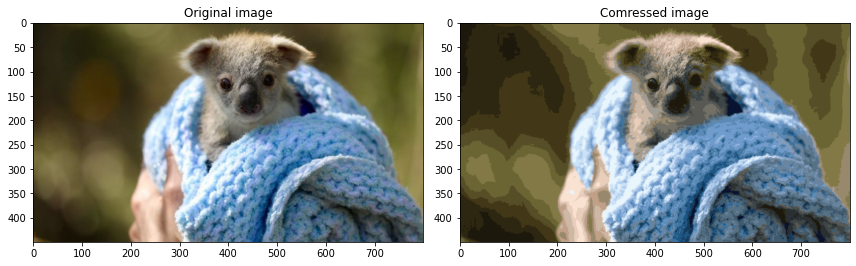

In [91]:
# Plotting results
fig, axes = plt.subplots(figsize=(12, 16), nrows=1, ncols=2)

axes[0].imshow(data)
axes[0].set_title('Original image')
axes[1].imshow(X_final.astype(int))
axes[1].set_title('Comressed image')

Conclusions:

Original image was: 800 * 450 * 3 * 8 = 8.640.000 bits, where 

    800 * 450 - number of pixels
    3 - number of channels (RGB)
    8 - each color value is integer [0, 255]
    
Compressed image is 800 * 450 * 5 + 30 * 24 = 1.800.720 bits, where

    800 * 450 - number of pixels
    5 - number that allocates each pixel it's own color (int from 0 to 29 - cluster index)
    30 * 24 - 30 clusters, each cluster is (1, 3) array with ints [0, 255]







### 4. k definition strategy

#### The Elbow Method

We plot the squared error-versus-k graph to find the elbow which indicates the right k value. (Squared error is square of the distance of each point from its centroid)

In [119]:
def sq_error(X, C, labels):
    
    '''
    Computes squared error for the entire dataset
    
    X: dataset
    C: centroids
    labels: np.array(X.shape[0], )
    
    returns: squared error
    '''
    
    dist = 0
    for i in range(C.shape[0]):
        dist += np.sum(np.linalg.norm(X[labels == i] - C[i].reshape(1, -1), axis=1) ** 2)
    
    return dist


def gen_curve(X, k_max):
    
    '''
    Computes squared error for each k from [1, k_max]
    
    X: dataset
    k_max: k maximum value
    
    returns: np.array(k_max) - array of squared errors
    '''
    
    errors = np.empty(0)
    for k in range(1, k_max + 1):
        C = pp_centroids(X, k) # using k-means++
        C_final, _ = fit(X, C, num_epochs=10)
        labels = assign_label(X, C_final)
        errors = np.append(errors, sq_error(X, C_final, labels))
        
    return errors

def predict_k(errors, eps=0.1):
    
    '''
    Predicts k: k is appropriate if the next error step is less then [eps] * last error step
    
    errors: np.array(k_max) - array of squared errors
    eps: number from 0 to 1
    
    returns: k
    '''
    
    for k in range(1, len(errors)):
        last_step = errors[k - 1] - errors[k]
        cur_step = errors[k] - errors[k + 1]
        
        if cur_step < last_step * eps:
            return k + 1
    
    return -1 

##### Evaluation

Text(0, 0.5, 'squared error')

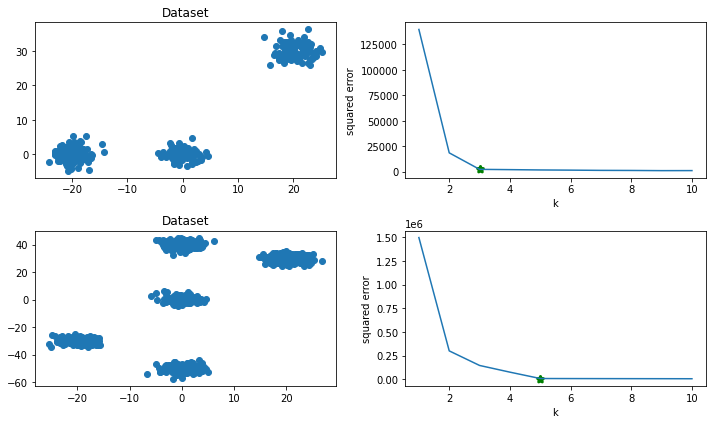

In [160]:
# test datasets

# dataset 1
X1 = np.random.randn(70, 2) * 2
X1 = np.append(X1, np.random.randn(100, 2) * 2 - [20, 0], axis=0)
X1 = np.append(X1, np.random.randn(100, 2) * 2 + [20, 30], axis=0)

# dataset 2
X2 = np.random.randn(150, 2) * 2
X2 = np.append(X2, np.random.randn(150, 2) * 2 - [20, 30], axis=0)
X2 = np.append(X2, np.random.randn(200, 2) * 2 + [20, 30], axis=0)
X2 = np.append(X2, np.random.randn(200, 2) * 2 + [20, 30], axis=0)
X2 = np.append(X2, np.random.randn(200, 2) * 2 + [0, 40], axis=0)
X2 = np.append(X2, np.random.randn(200, 2) * 2 - [0, 50], axis=0)

# errors and k for 1st dataset
errors1 = gen_curve(X1, 10)
k1 = predict_k(errors1)

# errors and k for 2nd dataset
errors2 = gen_curve(X2, 10)
k2 = predict_k(errors2)

fig, axes = plt.subplots(figsize=(10, 6), nrows=2, ncols=2)
axes[0][0].scatter(X1[:, 0], X1[:, 1])
axes[0][0].set_title('Dataset')
axes[0][1].plot(list(range(1, len(errors1) + 1)), errors1)
axes[0][1].scatter(k1, errors1[k1 - 1], c='green', marker='*', linewidths=3.)
axes[0][1].set_xlabel('k')
axes[0][1].set_ylabel('squared error')

axes[1][0].scatter(X2[:, 0], X2[:, 1])
axes[1][0].set_title('Dataset')
axes[1][1].plot(list(range(1, len(errors2) + 1)), errors2)
axes[1][1].scatter(k2, errors2[k2 - 1], c='green', marker='*', linewidths=3.)
axes[1][1].set_xlabel('k')
axes[1][1].set_ylabel('squared error')

#### The Silhouette Method

For each point we compute the Silhouette Value $sil(i) = \frac{d(i) - s(i)}{\max(d(i), s(i))}$, where 

$s(i)$ - similarity measure of the point (the mean distance between the point and other points of it's cluster); 

$d(i)$ - dissimilarity measure of the point (the minimum mean distance between the point and other clusters' points)

Then we sum up all the Silhouette Values. The result reaches it's maximum at the appropriate k value.

In [121]:
def similarity(X_cluster, point):
    
    '''
    Computes similarity measure for given point
    
    X_cluster: cluster dataset
    point: np.array(1, dim) - point
    
    returns: similarity measure
    '''
    
    if X_cluster.shape[0] == 1:
        return 0
    
    return np.sum(np.linalg.norm(X_cluster - point, axis=1)) / (X_cluster.shape[0] - 1)


def dissimilarity(X, point, labels):
    
    '''
    Computes dissimilarity measure for given point
    
    X: dataset
    point: np.array(1, dim) - point
    labels: np.array(X.shape[0], )
    
    returns: dissimilarity measure
    '''
    
    if np.max(labels) == 0:
        return 0
    
    point_label = labels[np.argmax((X == point).all(axis=1))]
    distances = np.empty(0)
    
    for label in range(np.max(labels) + 1):
        if label == point_label:
            continue
        computed_distances = compute_distances(X[labels == label], point)
        distances = np.append(distances, np.mean(computed_distances, axis=0))
    
    return np.min(distances)


def sil_score(X, k_max):
    
    '''
    Computer scores for each k from [1, k_max]
    
    X: dataset
    k_max: k maximum value
    
    returns: np.array(k_max, ) - scores
    '''
    
    scores_array = np.empty(0)
    
    for k in range(1, k_max + 1):
        
        sil_value = 0
        C_0 = pp_centroids(X, k)
        C_last, _ = fit(X, C_0, num_epochs=10)
        labels = assign_label(X, C_last)
        
        for point in X:
            
            point_label = labels[np.argmax((X == point.reshape(1, -1)).all(axis=1))]
            
            sim = similarity(X[labels == point_label], point.reshape(1, -1))
            dis = dissimilarity(X, point.reshape(1, -1), labels)
            
            sil_value += (dis - sim) / max(dis, sim)
            
        scores_array = np.append(scores_array, sil_value)
        
    return scores_array


def sil_k(scores):
    
    '''
    Returns appropriate k, k is appropriate if scores(k) = max(scores)
    
    scores: np.array(k_max, ) - scores
    
    returns: k
    '''
    
    return np.argmax(scores) + 1

##### Evaluation

Text(0, 0.5, 'score')

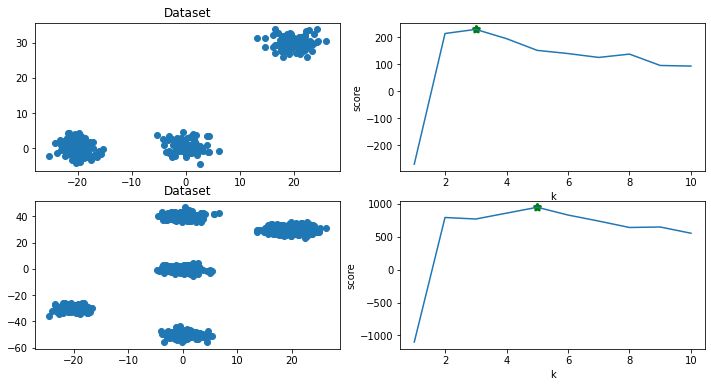

In [255]:
# test datasets

# dataset 1
X1 = np.random.randn(70, 2) * 2
X1 = np.append(X1, np.random.randn(100, 2) * 2 - [20, 0], axis=0)
X1 = np.append(X1, np.random.randn(100, 2) * 2 + [20, 30], axis=0)

# dataset 2
X2 = np.random.randn(150, 2) * 2
X2 = np.append(X2, np.random.randn(150, 2) * 2 - [20, 30], axis=0)
X2 = np.append(X2, np.random.randn(200, 2) * 2 + [20, 30], axis=0)
X2 = np.append(X2, np.random.randn(200, 2) * 2 + [20, 30], axis=0)
X2 = np.append(X2, np.random.randn(200, 2) * 2 + [0, 40], axis=0)
X2 = np.append(X2, np.random.randn(200, 2) * 2 - [0, 50], axis=0)

# errors and k for 1st dataset
s1 = sil_score(X1, 10)
k1 = sil_k(s1)

# errors and k for 2nd dataset
s2 = sil_score(X2, 10)
k2 = sil_k(s2)

fig, axes = plt.subplots(figsize=(12, 6), nrows=2, ncols=2)
axes[0][0].scatter(X1[:, 0], X1[:, 1])
axes[0][0].set_title('Dataset')
axes[0][1].plot(list(range(1, len(s1) + 1)), s1)
axes[0][1].scatter(k1, s1[k1 - 1], c='green', marker='*', linewidths=3.)
axes[0][1].set_xlabel('k')
axes[0][1].set_ylabel('score')

axes[1][0].scatter(X2[:, 0], X2[:, 1])
axes[1][0].set_title('Dataset')
axes[1][1].plot(list(range(1, len(s2) + 1)), s2)
axes[1][1].scatter(k2, s2[k2 - 1], c='green', marker='*', linewidths=3.)
axes[1][1].set_xlabel('k')
axes[1][1].set_ylabel('score')

### 5. Time efficiency research

To estimate the most effecient initialization way we can plot a time-versus-k curves for each method.

In [42]:
from time import time

def get_time(method, X, k_max, num_epochs=10):
    
    '''
    Computes time for each iteration of fit() for different k
    
    method: initialization function
    X: dataset
    k_max: maximum value of k
    num_epochs: number of epochs for fit()
    
    returns: np.array(k_max, )
    '''
    
    time_array = np.empty(0)
    
    for k in range(1, k_max + 1):
        
        C_0 = method(X, k)
        tic = time()
        C_last, _ = fit(X, C_0.reshape(-1, 2), num_epochs)
        time_array = np.append(time_array, time() - tic)
        
    return time_array

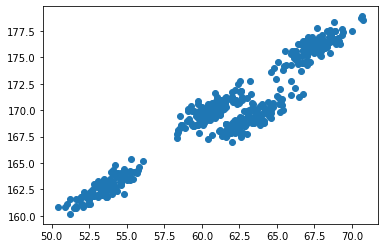

In [86]:
# dataset 
import pandas as pd

X = pd.read_csv('clustering.csv').values
plt.scatter(X[:, 0], X[:, 1])

In [87]:
# evaluation
rc_time = get_time(gen_centroids, X, 20)
pp_time = get_time(pp_centroids, X, 20)
pa_time = get_time(pa_centroids, X, 20)
ci_time = get_time(ci_centroids, X, 20)

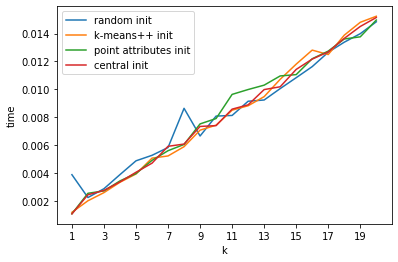

In [90]:
plt.plot(list(range(1, len(rc_time) + 1)), rc_time, label='random init')
plt.plot(list(range(1, len(pp_time) + 1)), pp_time, label='k-means++ init')
plt.plot(list(range(1, len(pa_time) + 1)), pa_time, label='point attributes init')
plt.plot(list(range(1, len(ci_time) + 1)), ci_time, label='central init')
plt.xticks(list(range(1, 21, 2)))
plt.xlabel('k')
plt.ylabel('time')
plt.legend()

##### Conclusions:

A significant difference in time is observed between random initialization method and others. K-means++ usually perfoms better than others due to precise initialization.

### 6. Distance visualization

In [117]:
import seaborn as sns
sns.set_theme()

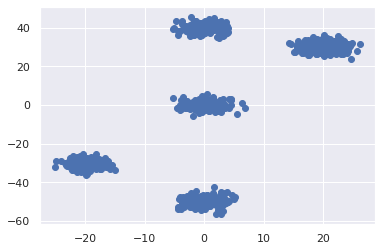

In [148]:
# dataset for vizualisation 

X = np.random.randn(150, 2) * 2
X = np.append(X, np.random.randn(150, 2) * 2 - [20, 30], axis=0)
X = np.append(X, np.random.randn(200, 2) * 2 + [20, 30], axis=0)
X = np.append(X, np.random.randn(200, 2) * 2 + [20, 30], axis=0)
X = np.append(X, np.random.randn(200, 2) * 2 + [0, 40], axis=0)
X = np.append(X, np.random.randn(200, 2) * 2 - [0, 50], axis=0)
X = X[np.random.permutation(X.shape[0])]

plt.scatter(X[:, 0], X[:, 1])

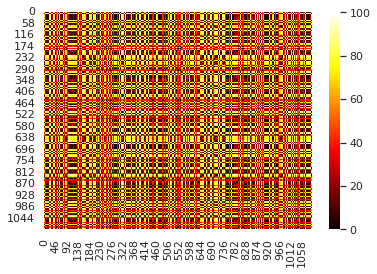

In [120]:
# distance matrix

M = compute_distances(X, X)
ax = sns.heatmap(M, cmap='hot')

##### Clustering

In [124]:
score = sil_score(X, 10)
k = sil_k(score)

print(f'k = {k}')

k = 5


The optimal k value is equal to 5. We can compare matrices for k from [1, 10] to prove that.

In [145]:
def order_matrix(X, labels):
    
    '''
    Creates matrix where X features go in right labels order
    
    X: dataset
    labels: np.array(X.shape[0], )
    
    returns: np.array(X.shape[0], X.shape[0]) - distance matrix
    '''
    
    X_ordered = X[np.argsort(labels)]
    
    return compute_distances(X_ordered, X_ordered)


def gen_matrices(X, k_max):
    
    '''
    Creates (k_max, X.shape[0], X.shape[0]) tensor
    
    X: dataset
    k_max: maximum value of k 
    
    returns: (k_max, X.shape[0], X.shape[0]) tensor
    '''
    
    tnsr = np.empty((0, X.shape[0], X.shape[0]))
    
    for k in range(1, k_max + 1):
        
        C_0 = pp_centroids(X, k)
        C_last, _ = fit(X, C_0, 10)
        labels = assign_label(X, C_last)
        
        tnsr = np.append(tnsr, np.expand_dims(order_matrix(X, labels), axis=0), axis=0)
        
    return tnsr

In [149]:
# tensor
tnsr = gen_matrices(X, 10)

In [155]:
# iterator due to easier navigation in tensor elements
itrtr = iter(tnsr)

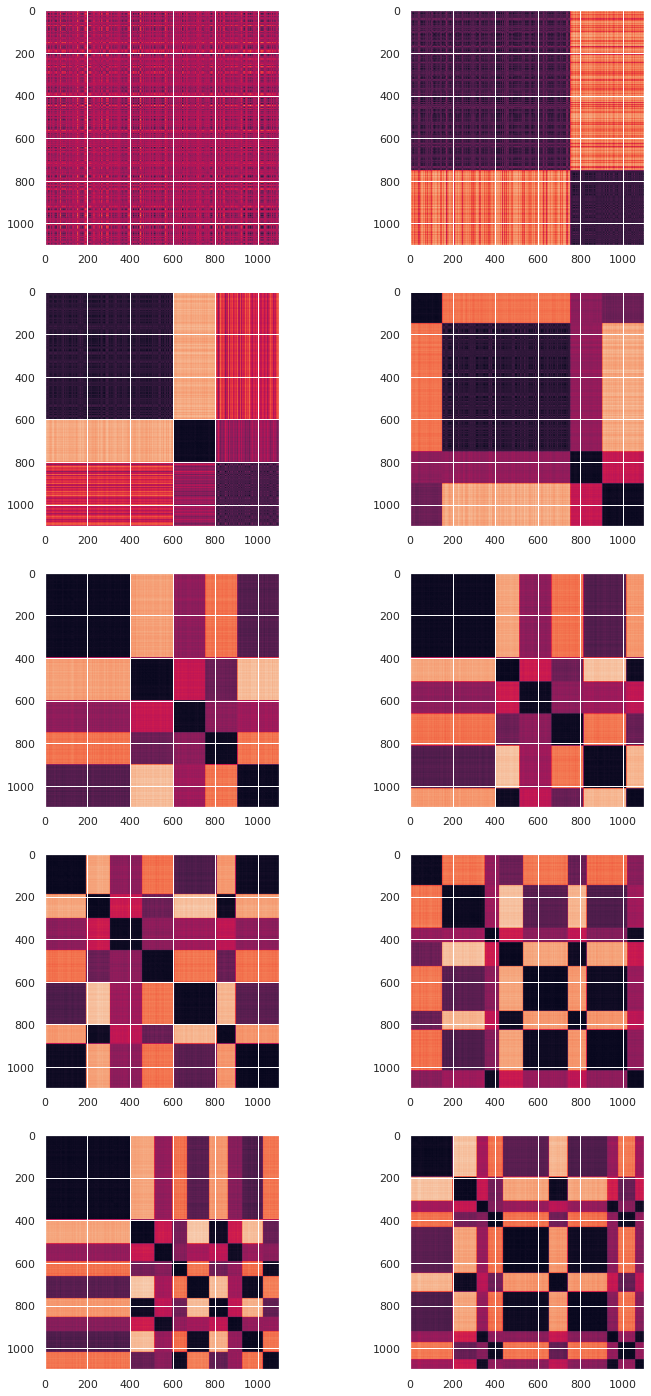

In [156]:
# plots
fig, axes = plt.subplots(figsize=(12, 25), nrows=5, ncols=2)

for i in range(5):
    for j in range(2):
        
        axes[i][j].imshow(next(itrtr))

##### Conclusions:
For k from [1, 4] diagonal elements do not seem to be black, which means that distances between cluster elements are large; hence, k from [1, 4] is not the best option. For k = 5 all diagonal elements are black and the cluster distances are small. For k from [6, 10] non-diagonal black squares appear, which means that we break the correct clusters down into smaller clusters. Thus, k = 5 is the optimal value for the number of clusters, which confirms the Silhouette Method result.